In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-228-1 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Ester fuel,Unnamed: 8,Unnamed: 9,...,Phenol waste,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Fuel dimer,Alanine waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3589.46,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,0.000000,1.0,0.000,0.000,0.00,0.000000,0.000000,29215.9,8.139358,--
1,0,7.000000,2704.54,5.754473,115.3950,0.245527,54154.4,45.081229,852.161,0.517265,...,2.209383,84533.6,533.258,227.653,5279.64,0.120343,2.790944,22690.6,8.046498,NaN
2,291,11.850000,1378.37,5.829202,40.3867,0.170798,26690.3,44.152245,406.431,0.538717,...,3.175419,43324.9,210.004,100.172,3837.93,0.101071,3.872364,11617.9,8.188790,NaN
3,542,16.033333,1382.06,5.822916,42.0306,0.177084,26109.4,43.188785,456.248,0.615652,...,4.056514,42479.0,209.166,113.167,4837.79,0.113754,4.862886,11569.4,8.124062,NaN
4,793,20.216667,1388.41,5.893107,25.1840,0.106893,25541.5,42.134316,570.113,0.857393,...,4.925202,41529.9,226.451,119.963,5771.11,0.120547,5.799214,11678.0,8.261212,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Fuel,Unnamed: 8,Unnamed: 9,...,Waste,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Fuel dimer,Alanine waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-420,0.000000,3589.46,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,0.000000,1.0,0.000,0.000,0.00,0.000000,0.000000,29215.9,8.139358,--
1,0,7.000000,2704.54,5.754473,115.3950,0.245527,54154.4,45.081229,852.161,0.517265,...,2.209383,84533.6,533.258,227.653,5279.64,0.120343,2.790944,22690.6,8.046498,NaN
2,291,11.850000,1378.37,5.829202,40.3867,0.170798,26690.3,44.152245,406.431,0.538717,...,3.175419,43324.9,210.004,100.172,3837.93,0.101071,3.872364,11617.9,8.188790,NaN
3,542,16.033333,1382.06,5.822916,42.0306,0.177084,26109.4,43.188785,456.248,0.615652,...,4.056514,42479.0,209.166,113.167,4837.79,0.113754,4.862886,11569.4,8.124062,NaN
4,793,20.216667,1388.41,5.893107,25.1840,0.106893,25541.5,42.134316,570.113,0.857393,...,4.925202,41529.9,226.451,119.963,5771.11,0.120547,5.799214,11678.0,8.261212,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.405283e-03 1.307849e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fc5f8015880>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fc5f8015850>

Goodness of fit qualifiers:
chi_squared            5.43886511673699
objective_value        2.719432558368495
r_squared              0.9666070838050185


<IPython.core.display.Javascript object>


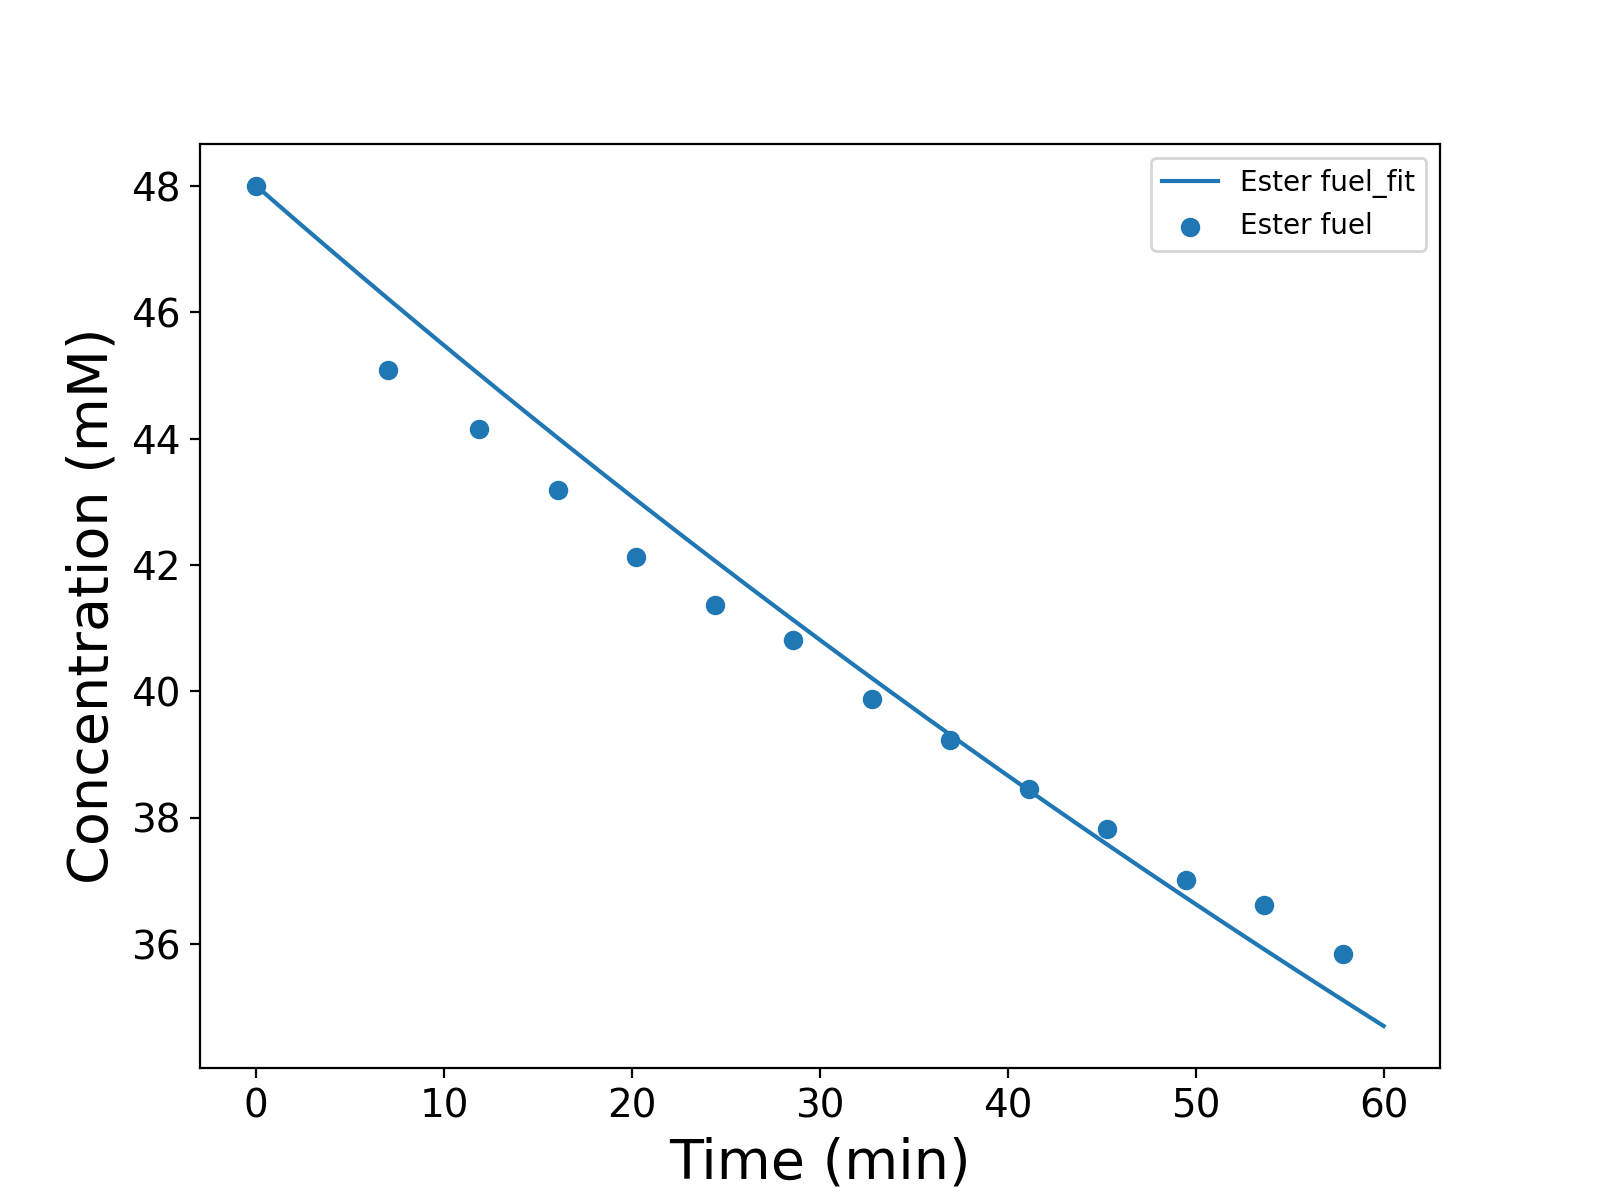

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-228-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [10]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-228-2 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Ester fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3663.96,6.000000,0.000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,31035.0,8.470344,--
1,0,6.000000,2586.23,5.380993,297.509,0.619007,57138.5,43.080587,1848.620,0.945175,...,88858.0,1186.400,409.463,819.783,7924.00,0.198132,3.834285,25878.5,8.973940,NaN
2,278,10.633333,1185.56,5.504700,106.674,0.495300,23669.0,41.497120,584.753,0.651157,...,38293.1,454.167,207.876,365.448,5597.85,0.222137,5.981882,11404.0,8.825027,NaN
3,529,14.816667,1191.55,5.512471,105.382,0.487529,22517.6,39.586192,642.081,0.758260,...,36466.6,400.595,242.287,408.707,7320.46,0.259369,7.836589,11391.0,8.783036,NaN
4,780,19.000000,1185.33,5.518086,103.519,0.481914,21640.3,37.727829,697.703,0.855428,...,34959.2,398.605,319.166,469.680,8957.19,0.339660,9.532339,11368.1,8.820351,NaN


In [11]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3663.96,6.000000,0.000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,31035.0,8.470344,--
1,0,6.000000,2586.23,5.380993,297.509,0.619007,57138.5,43.080587,1848.620,0.945175,...,88858.0,1186.400,409.463,819.783,7924.00,0.198132,3.834285,25878.5,8.973940,NaN
2,278,10.633333,1185.56,5.504700,106.674,0.495300,23669.0,41.497120,584.753,0.651157,...,38293.1,454.167,207.876,365.448,5597.85,0.222137,5.981882,11404.0,8.825027,NaN
3,529,14.816667,1191.55,5.512471,105.382,0.487529,22517.6,39.586192,642.081,0.758260,...,36466.6,400.595,242.287,408.707,7320.46,0.259369,7.836589,11391.0,8.783036,NaN
4,780,19.000000,1185.33,5.518086,103.519,0.481914,21640.3,37.727829,697.703,0.855428,...,34959.2,398.605,319.166,469.680,8957.19,0.339660,9.532339,11368.1,8.820351,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.114901e-02 2.388843e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   8
Objective              <symfit.core.objectives.LeastSquares object at 0x7fc61aeb78b0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fc61aeb79a0>

Goodness of fit qualifiers:
chi_squared            10.672592728949212
objective_value        5.336296364474606
r_squared              0.9797473006514139


<IPython.core.display.Javascript object>


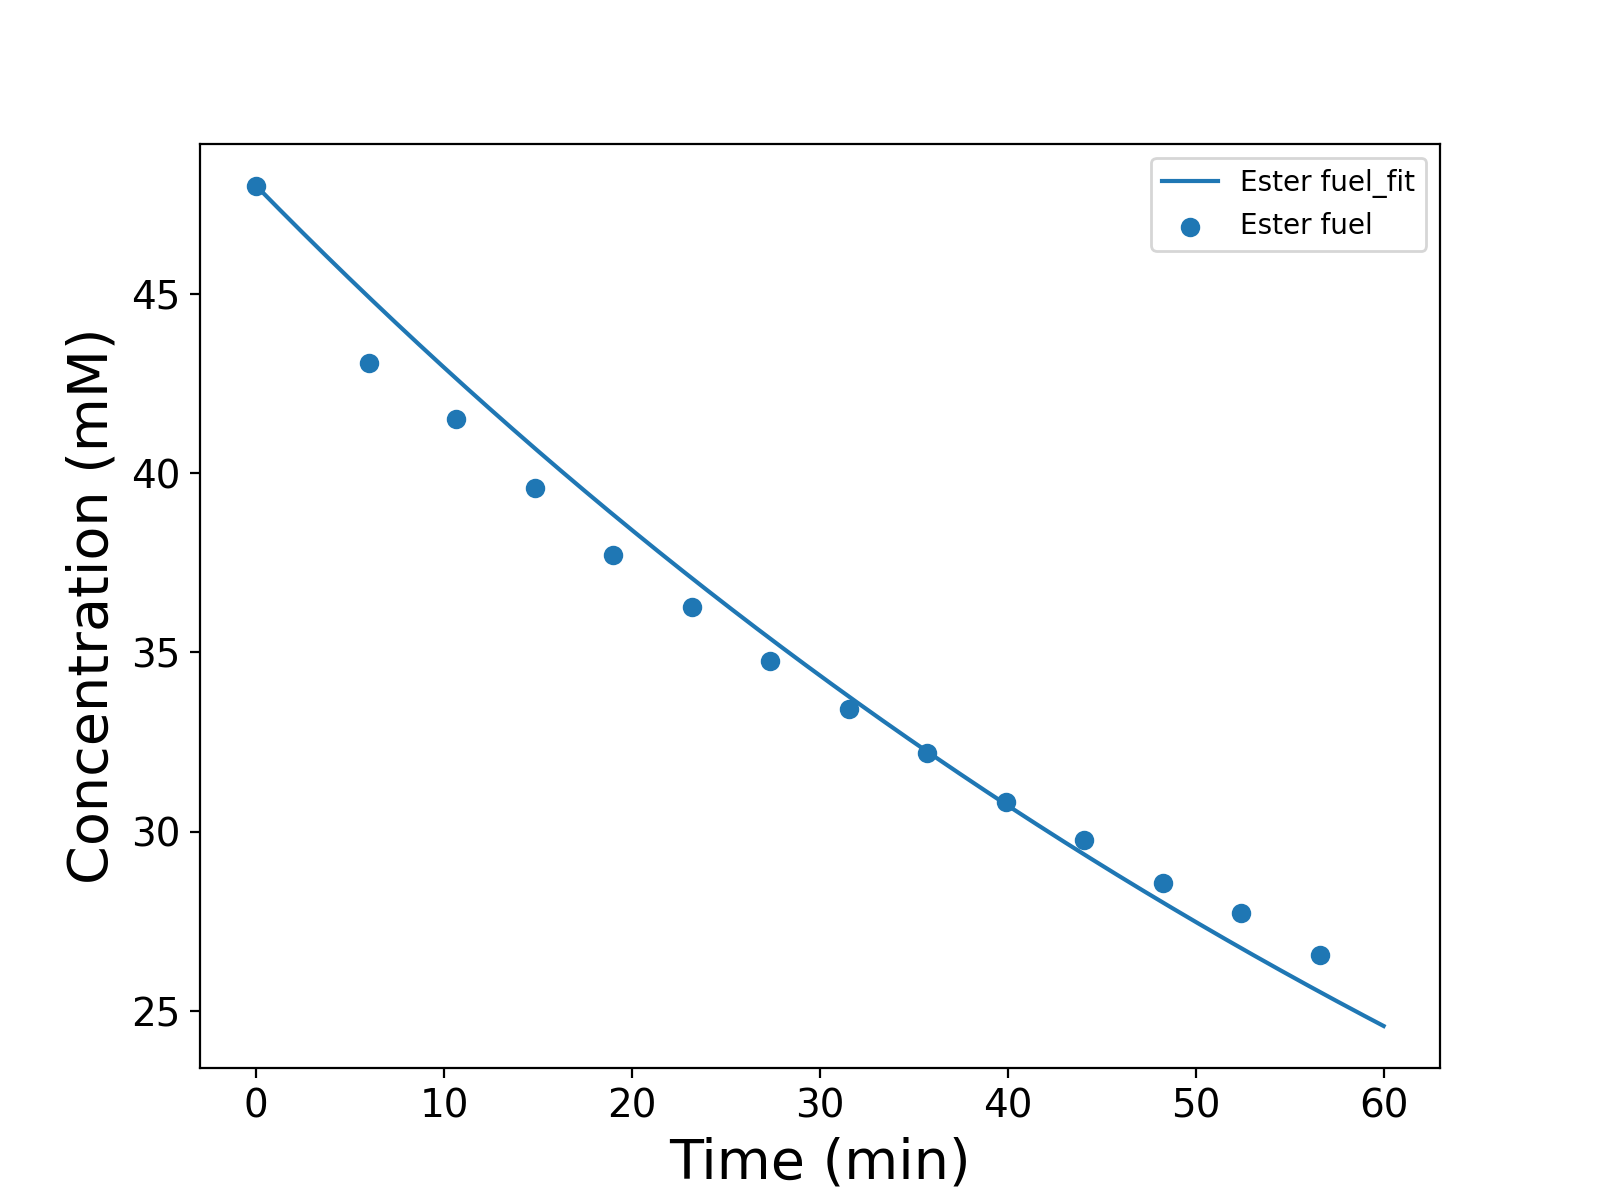

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-228-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [16]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-228-3 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Imine ester assembly that precipitated,Unnamed: 8,Ester fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-480,0.000000,3494.880,6.000002,0.000,0.000000,-0.001075,-0.000002,1.0,48.103405,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,28993.9,8.296107,--
1,0,8.000000,1809.820,3.136858,542.969,0.941097,1108.929806,1.922045,56930.8,38.145042,...,87158.2,2011.810,984.439,1444.650,15772.70,0.440088,7.051103,28718.8,12.206279,NaN
2,278,12.633333,682.127,2.945760,212.040,0.915693,495.207056,2.138547,20773.4,35.277423,...,32981.9,739.369,563.155,757.315,8765.48,0.617054,9.604423,11526.4,12.890657,NaN
3,528,16.800000,698.070,3.090735,202.409,0.896175,454.674198,2.013090,19468.3,33.505729,...,31262.4,848.866,870.053,1018.640,10876.70,0.930607,11.633700,11242.5,12.485022,NaN
4,779,20.983333,727.294,3.161549,165.535,0.719581,487.432351,2.118870,18197.9,31.541618,...,29073.4,622.928,829.383,971.625,12315.50,0.908647,13.492484,11450.8,12.825300,NaN


In [17]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Imine ester assembly that precipitated,Unnamed: 8,Fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-480,0.000000,3494.880,6.000002,0.000,0.000000,-0.001075,-0.000002,1.0,48.103405,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,28993.9,8.296107,--
1,0,8.000000,1809.820,3.136858,542.969,0.941097,1108.929806,1.922045,56930.8,38.145042,...,87158.2,2011.810,984.439,1444.650,15772.70,0.440088,7.051103,28718.8,12.206279,NaN
2,278,12.633333,682.127,2.945760,212.040,0.915693,495.207056,2.138547,20773.4,35.277423,...,32981.9,739.369,563.155,757.315,8765.48,0.617054,9.604423,11526.4,12.890657,NaN
3,528,16.800000,698.070,3.090735,202.409,0.896175,454.674198,2.013090,19468.3,33.505729,...,31262.4,848.866,870.053,1018.640,10876.70,0.930607,11.633700,11242.5,12.485022,NaN
4,779,20.983333,727.294,3.161549,165.535,0.719581,487.432351,2.118870,18197.9,31.541618,...,29073.4,622.928,829.383,971.625,12315.50,0.908647,13.492484,11450.8,12.825300,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.714647e-02 6.381911e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   8
Objective              <symfit.core.objectives.LeastSquares object at 0x7fc62b936d60>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fc62b936dc0>

Goodness of fit qualifiers:
chi_squared            49.731978345764325
objective_value        24.865989172882163
r_squared              0.9379462339512912


<IPython.core.display.Javascript object>


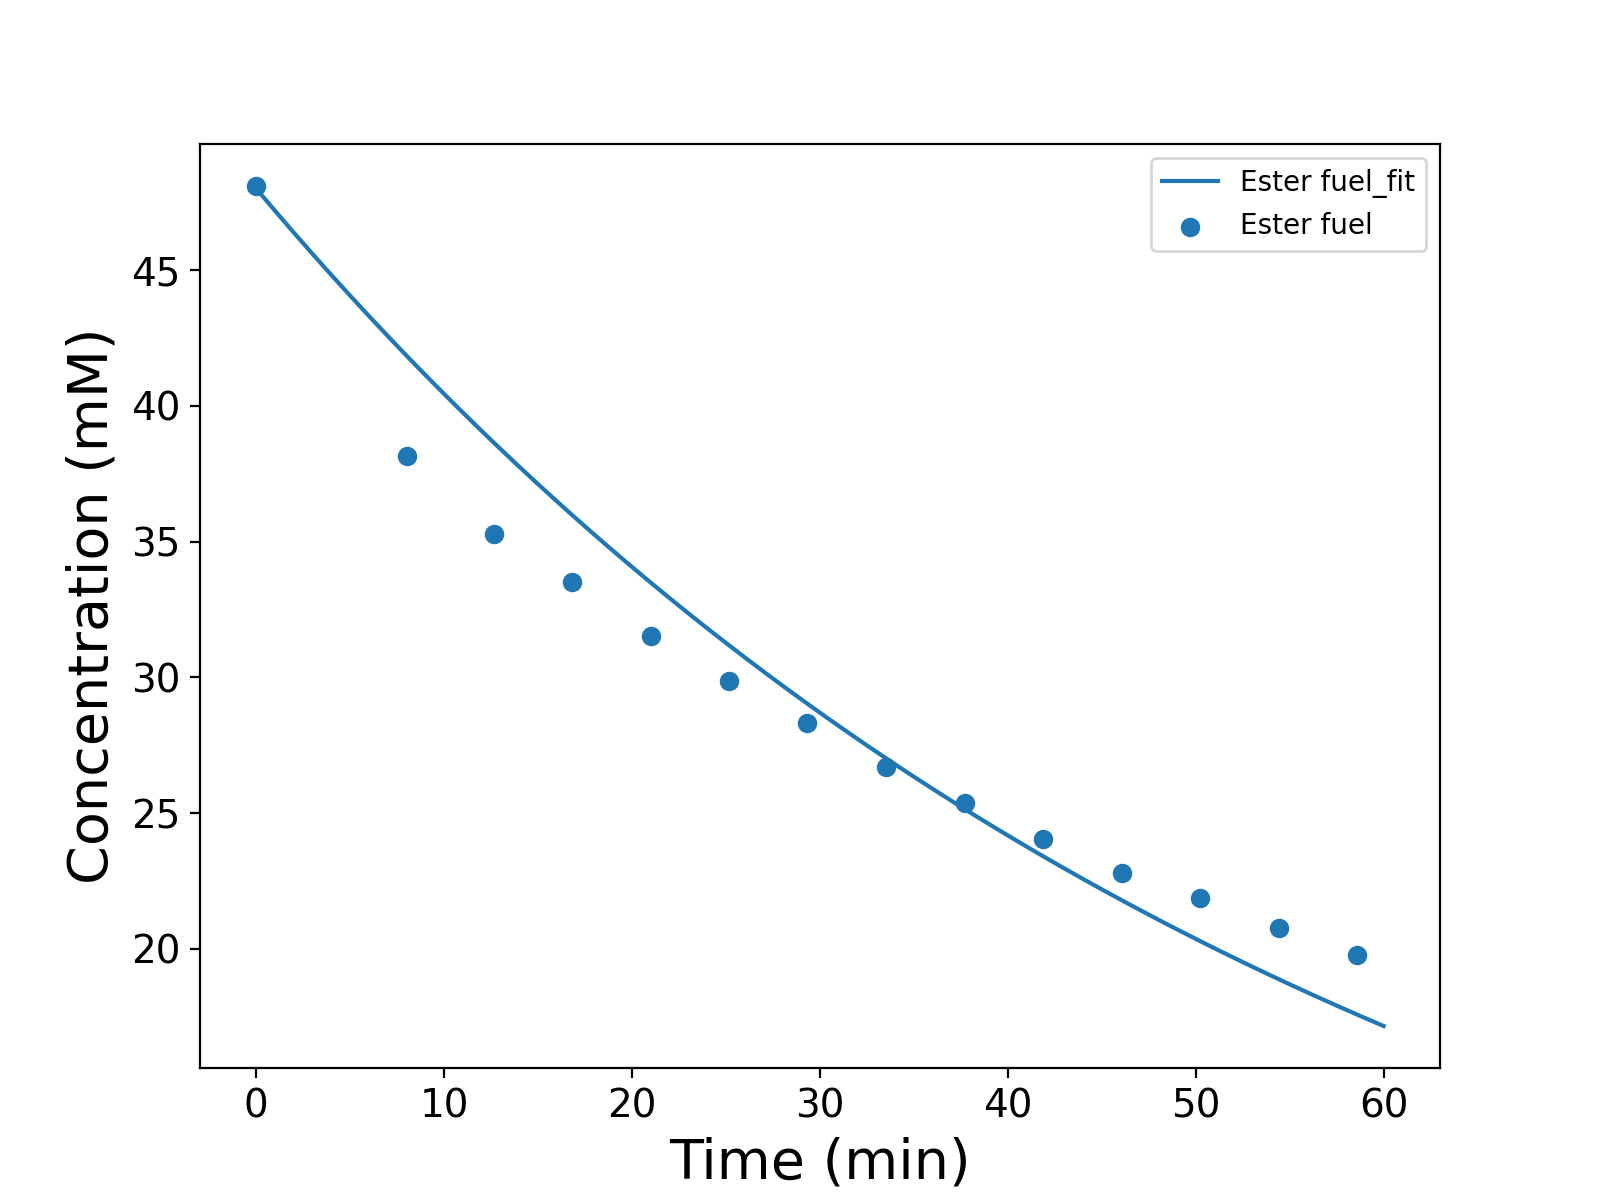

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-228-3 (pH 7.00) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [22]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-228-4 truncated.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester assembly that precipitated,Unnamed: 12,Ester fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Phenol waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-480,0.000000,2793.1200,5.999997,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000003,1.00,47.859866,0.00,0.000000,0.0,0.000000,21865.7,7.828414,--
1,0,8.000000,121.7570,0.261728,355.470,0.764114,79.3478,0.170565,51.6426,0.111010,...,4.692582,27184.30,24.073761,5010.69,3.807755,17641.0,15.622444,21850.9,35.926134,NaN
2,277,12.616667,60.9377,0.257114,178.501,0.753148,92.5022,0.390294,28.6879,0.121043,...,4.478401,10079.90,17.714544,2902.06,4.472717,12208.1,21.454670,11132.3,30.869137,NaN
3,528,16.800000,105.4130,0.452310,142.095,0.609706,93.8555,0.402718,49.5507,0.212614,...,4.322653,7520.77,13.334432,3016.24,4.843963,14520.7,25.745407,10946.7,28.002820,NaN
4,779,20.983333,107.9060,0.456205,122.873,0.519483,125.2420,0.529498,47.8104,0.202133,...,4.292681,5720.58,10.232676,2915.14,4.774873,16168.0,28.920478,11109.9,27.511234,NaN


In [23]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,SachCHO,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Imine ester assembly that precipitated,Unnamed: 12,Fuel,Unnamed: 14,Fuel dimer,Unnamed: 16,Waste,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,-480,0.000000,2793.1200,5.999997,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000003,1.00,47.859866,0.00,0.000000,0.0,0.000000,21865.7,7.828414,--
1,0,8.000000,121.7570,0.261728,355.470,0.764114,79.3478,0.170565,51.6426,0.111010,...,4.692582,27184.30,24.073761,5010.69,3.807755,17641.0,15.622444,21850.9,35.926134,NaN
2,277,12.616667,60.9377,0.257114,178.501,0.753148,92.5022,0.390294,28.6879,0.121043,...,4.478401,10079.90,17.714544,2902.06,4.472717,12208.1,21.454670,11132.3,30.869137,NaN
3,528,16.800000,105.4130,0.452310,142.095,0.609706,93.8555,0.402718,49.5507,0.212614,...,4.322653,7520.77,13.334432,3016.24,4.843963,14520.7,25.745407,10946.7,28.002820,NaN
4,779,20.983333,107.9060,0.456205,122.873,0.519483,125.2420,0.529498,47.8104,0.202133,...,4.292681,5720.58,10.232676,2915.14,4.774873,16168.0,28.920478,11109.9,27.511234,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        7.420532e-02 2.167499e-03
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fc61aeb70d0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fc61aeb7250>

Goodness of fit qualifiers:
chi_squared            18.97549373369272
objective_value        9.48774686684636
r_squared              0.9907564539986513


<IPython.core.display.Javascript object>


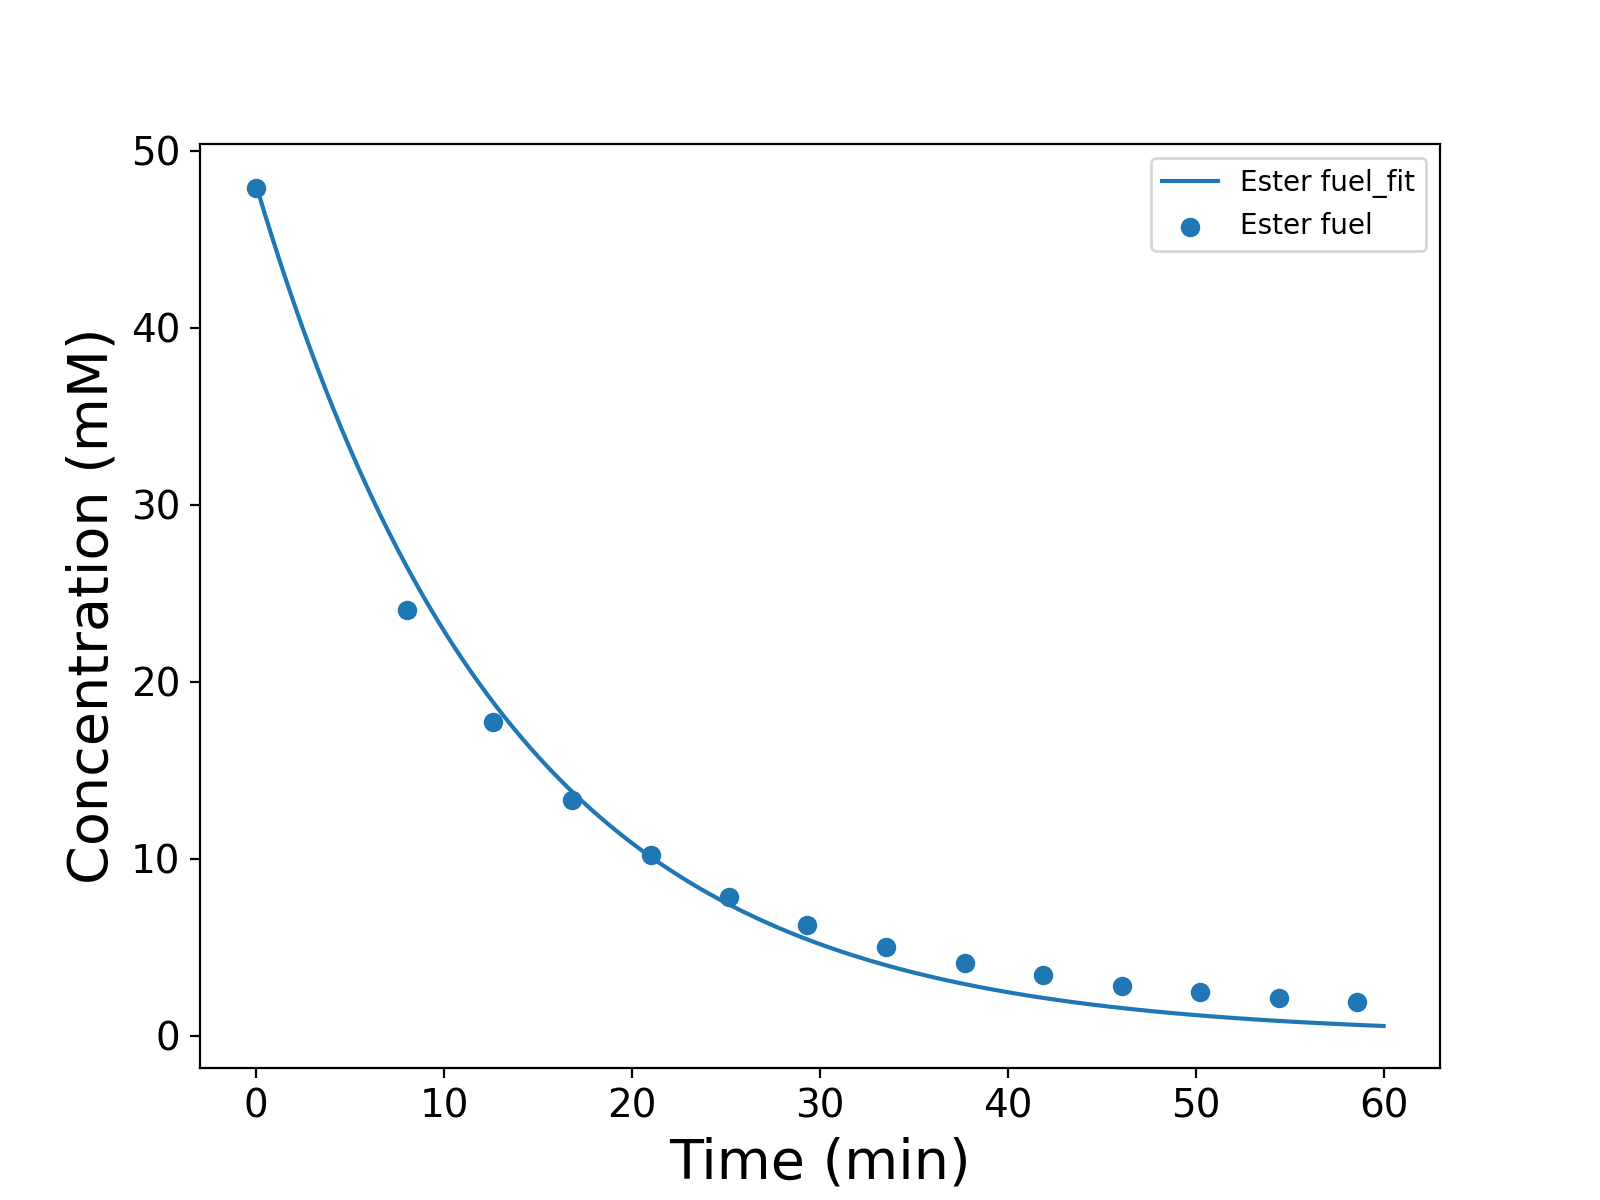

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-228-4 (pH 7.90) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()